# Gradient Descent

## Introduction

*Gradient Descent* is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.  
  
  
Suppose we have to minimize the value of "W" for a given loss function. Concretely, we start by filling "W" with random values (*random initialization*). Then we improve it gradually, taking one baby step at a time, each step attempting to decrease the loss function, until the algorithm converges to a minimum.

![](gd1.png)

Let's first try to grab the concept with a raw example, keeping all ML algorithms aside.  

Let's say we have an equation $y = 3x^2 - 2x + 5$. By solving this equation,  

$\dfrac{dy}{dx} = 6x - 2$  

$\dfrac{dy}{dx}= 
\begin{cases}
    +_{ve} ,& \text{when } x > \frac{1}{3}\\
    0,              & \text{when } x = \frac{1}{3}\\
    -_{ve} ,& \text{when } x < \frac{1}{3}\\
\end{cases}$  


and we know that minimum values exist when $\frac{dy}{dx} = 0$, so $y$ will be minimum at $x=\frac{1}{3}$

![](gd2.png)

Suppose we don't know about the minima of this equation, and we want to find it by Gradient Descent. So we'll start by initializing a random value of $x$, and then proceed to the minima.  

 
> Let's try putting $x = \frac{1}{6}$  

So, $\frac{dy}{dx} = -2$, we know that for minimum value $\frac{dy}{dx}$ should be $0$. So that means we have to move in the +ve X direction.  

  
> So Let's try putting $x = \frac{2}{3}$  

So, $\frac{dy}{dx} = 2$, we know that for minimum value $\frac{dy}{dx}$ should be $0$. So that means we have moved ahead of minima in +ve direction, we have to move back in -ve direction.  

  
> Let's proceed by putting $x = \frac{1}{3}$  

So, $\frac{dy}{dx} = 0$, and we know that for minimum value $\frac{dy}{dx}$ should be $0$. So that means we have got our minima at $x=\frac{1}{3}$.  

  
So by performing these iterations, we can reach the minima of an equation.  
Now in case of vectors,  
Suppose the jacobian matrix is $\begin{bmatrix} 2 \\ 3 \end{bmatrix}$. This tells we have gone further in both $w_1$ and $w_2$ direction, and we need to go back, and similarly $\begin{bmatrix} 2 \\ -3 \end{bmatrix}$ tells us that we have gone further in $w_1$ but we still need to proceed in $w_2$ direction.  
  
This is the basic idea for the gradient descent approach, and how it helps to approach the minima.  
  
***

### General Algorithm
Now for larger calculations, we need a general formula for Gradient Descent.  

> **for** $n\_epochs$:  
> 
> $\hspace{1cm}w' = w' - \alpha\dfrac{dL}{dw}$

Here, we have two new Parameters => "$n\_epochs$" and "$\alpha$"  

> #### $n\_epochs$
> 
>
> It is the no. of iterations, we need to perform to reach the minima. It is an important parameter as if it's value is too low, our model will stop before reaching the minima, and thus increasing the error of the model. And if it's value is set too high, it will affect the efficieny of the model, making it very slow.  
> 
> So it's value is adjusted in a way that neither our model stops before reaching the minima, nor it goes through unnecessary iterations, making the model slow.  
> 
> Note that if our model reaches the minima the $\frac{dL}{dw}$ term becomes 0, which means the value of $w'$ will no longer be updated in the further epochs, but the program still continues to run without making any contribution, that is why we call them unnecessary iterations, which makes the model slow.  
> 
> 
> 
> #### $\alpha$ - Learning Rate
> 
> 
> It is another important parameter in Gradient Descent, which tells us about the size of the steps in each iterations. if the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time making our model very slow.  
> 

See in fig. below

![small%20learning%20rate.png](gd3.png)

On the other hand, if the learning rate $\alpha$ is too high, we might end up jumping across the valley and end up on the other side, possibly even higher up than we were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution. These kind of jumps are also known as "Outward Oscilaations".  


See the figure below for visualisation.

![large%20learning%20rate.png](gd4.png)

Finally, it's not necessary that the Loss function have only one global minima, or we can say it's not necessary that it's in a shape of a regular bowl. There may be holes, rigdes, plateus, and all sorts of irregular terrains, making the convergence different. So it totally depends on the initialization that if the loss converges to the global minima, or gets stuck in a local minima. Below given are two random initializations, one that is on the left gets stuck on a local minima, while one the right slowly approaches to the global one.

![gd2.png](gd5.png)

But fortunately in **most of the cases**, the loss function of a Linear Regression happens to be in a shape of regular bowl, which means no local minima's exist on the curve, just one global minimum exists. Plus another thing in our favour is, it is a continuous function in which the slope of the curve never changes much abruptly.  
  
  
Having these two odds in our favour tells us that the Gradient Descent Optimization is most likely to approach arbitarily close to the global minimum.
  
*** 

Now as we got the essence of Gradient Descent, let's take a look on it's different types.  

## Types of Gradient Descent

1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-Batch Gradient Descent

### Batch Gradient Descent

In Batch Gradient Descent, all points of the data are considered at every step. As a result it is terribly slow on very large training datasets, as well as making it the most accurate of all.  

**So, if computational power and time isn't an issue, we should always prefer using Batch Gradient Descent, to get the optimum results.**  

All of the concepts which we were talking about up until in Gradient Descent, are of Batch Gradient Descent.  

Now, let's try to code Batch Gradient Descent on a Linear Regression Dataset.

 **Importing & Plotting the Data**

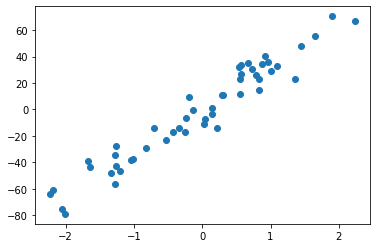

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.load("./Data/Linear Regression/X_data.npy")
y = np.load("./Data/Linear Regression/Y_data.npy")

plt.scatter(X,y)
plt.show()

In [2]:
# Adding constant column
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
y = y.reshape(-1,1)

print(X.shape, y.shape)

(50, 2) (50, 1)


#### Applying Gradient Descent Approach
  
As we saw in Multi-Variable Regression, the value of $\frac{dL}{dW}$ was :  

$\dfrac{dL}{dW} = 0 - 2X^Ty + 2X^TXW$  

and then we equated this equation to $0$ to find the value of W, on which our minima exist, but this time instead of equating it to $0$, we'll apply the approach of Gradient Descent to update our Loss.

In [3]:
learning_rate = 0.01
n_epochs = 1000

W = np.random.randn(X.shape[1],1) #Randomly Initializing W

# Updating W with gradient descent formula for n_epochs times
for i in range(n_epochs):
    dL_dW = (0 - 2*((X.T).dot(y)) + 2*(X.T.dot(X)).dot(W)) # <= dL/dW
    W = W - learning_rate*dL_dW

In [4]:
print(W)

[[2.55791360e-02]
 [3.23245309e+01]]


Here we calculated the value of W using Batch Gradient Descent keeping the value of $\alpha = 0.01$ i.e. learning_rate and we updated the value of W, 1000 times using the general Gradient Descent formula.  

  
  
Now as we calculated the value of W using Gradient Descent, let's compare it with the normal approach we used earlier in Multi-Variable Regression, to find W.  

$W = (X^TX)^{-1}X^Ty$

In [5]:
W_direct = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(W_direct)

[[2.55791360e-02]
 [3.23245309e+01]]


As we can see, the result of both the approaches are very similar.  

Thus we proved that the algorithm of Gradient Descent is itself powerful to reach the minima and we don't need to calulate the value of gradients on our own. But keep in mind here **learning_rate** and **n_epochs** are two important hyper-parameters, we should focus on.  


***

### Stochastic Gradient Descent

The main problem in Batch Gradient Descent is the fact that it still uses the whole training dataset to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent picks up a random instance in the training dataset at every step and computes the gradients based on that single instance. Obviously, working on a single instance at a time makes the algorithm much faster because it has a very little data to manipulate at every iteration. It also makes it possible to train on huge training datasets, since only one instance needs to be in memory at each iteration.  
  

On the other hand, due to stochastic nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decresing until it reaches the minimum, the loss function keeps bouncing up and down, decreasing only on average. Over time it will end up very close to minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.  
  
  
When the Loss function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum that Batch Gradient Descent does.  
  

Therefore, randomness is good to escape from local minima but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick process and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.  
  
  
**If computation speed is our top-most priority, and we can settle down with some very minor errors in our predictions, then Stochastic Gradient Descent is recommended.**  
  

Notice that since instances are picked randomly, some instances may be picked up several times per epoch, while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training dataset (making sure to shuffle the input features and the labels jointly), then go through it instance by instance, then shuffle it again, and so on. However, this approach generally converges more slowly.

  
>> When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled through the global minimum, on average. A very simple way to ensure this is to shuffle the training dataset at the beginning of each epoch). If you do not shuffle the instances - For example, if the instances are sorted by label - then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.
  

To perform Linear Regression, using Stochastic Gradient Descent we can use SGDRegressor class of Scikit-Learn library, however coding the SGDRegressor on our own is not an intense task at all. This is to provide you the idea about the Scikit-Learn Library.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.load("./Data/Linear Regression/X_data.npy")
y = np.load("./Data/Linear Regression/Y_data.npy")

In [7]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,eta0=0.01)
sgd_reg.fit(X,y)

SGDRegressor()

In [8]:
sgd_reg.intercept_, sgd_reg.coef_

(array([-0.00065003]), array([32.29970572]))

And as we can clearly see, the output by SGDRegressor is also very close to the normally calculated result.  
  
  
*Please Notice that  
    2.55791360e-02 = 0.00255791360   
    3.23245309e+01 = 32.3245309   
So don't get tangled in the different representation ways.*
   
    

***

### Mini-Batch Gradient Descent

It is a rather simple algorithm to understand after studying about Batch-Gradient Descent and Stochastic-Gradient Descent.  

In this algorithm at each step, instead of calculating the gradients based on the full training dataset (as in Batch Gradient Descent), or based on just one instance (as in Stochastic GD), Mini-Batch Gradient Descent computes the gradients on small random sets of instances called **mini-batches**.  

The main advantage of Mini-Bactch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.  

Mini-Batch GD reaches a bit closer to global minima as compared to Stochastic Gradient Descent, as well making it harder to escape local minima's.  
  
  
> **Note:**
> 
> Mini-Batch Gradient Descent can act like both:
> 
> Batch-Gradient descent (when batch_size = training set size), and
> 
> Stochastic Gradient Descent (when batch_size = 1).  
  
At the end, there is almost no difference between all the methods after training of the model. All these algorithms end up with very similar models and make predictions in exactly the same way. And the Answer to *"Which Algorithm is best among all?"* totally depends on type of dataset we're working on.  


Given below are the different Gradient Descent Paths of these Algorithms, you may be able to compare their convergence rate now.  

The Batch-Gradient Descent has the minimum irregularity among all and at converse we have Stochastic Gradient Descent having the maximum irregualrity. Mini-Batch GD lies somewhere between these two.


![](gd6.png)

## Further Readings

The sklearn implementation of these algorithms are a bit different. It involves a term **"Tolerance"** whose default value is "0.001", which means if the "W" is updated with the value lesser than tolerance, the algorithm will stop there. So, instead of totally relying on the no. of epochs, this approach seems to be a bit better. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html for more information regarding sklearn implementation of Gradient Descent.
    